In [4]:
import pandas as pd

# Define file paths (ensure raw string or double backslashes)
df_data_path = r"C:\Users\arman.manoukyan\Downloads\ms.data"
df_labels_path = r"C:\Users\arman.manoukyan\Downloads\ms.labels"

# Load the datasets
df_data = pd.read_csv(df_data_path)
df_labels = pd.read_csv(df_labels_path)

# Display the first few rows of each dataset
df_data.head(), df_labels.head()



(   0.2414938 0.0328371
 0  0.1679026 0.0204891
 1  0.1154796 0.0035192
 2  0.0447800 0.0182455
 3  0.2326265 0.0140409
 4  0.1846777 0.0476088,
    0
 0  1
 1  2
 2  3
 3  0
 4  1)

In [10]:
import pandas as pd

# Define file paths
df_data_path = r"C:\Users\arman.manoukyan\Downloads\ms.data"
df_labels_path = r"C:\Users\arman.manoukyan\Downloads\ms.labels"

# Load the datasets (ensuring no extra whitespace issues)
df_data = pd.read_csv(df_data_path, delimiter="\s+", header=None)  # Split on spaces
df_labels = pd.read_csv(df_labels_path, header=None)

# Rename columns for clarity
df_data.columns = [f"Feature_{i}" for i in range(df_data.shape[1])]
df_labels.columns = ["Label"]

# Combine datasets
df_combined = pd.concat([df_data, df_labels], axis=1)

# Display first few rows
print(df_combined.head())




   Feature_0  Feature_1  Label
0   0.241494   0.032837      0
1   0.167903   0.020489      1
2   0.115480   0.003519      2
3   0.044780   0.018246      3
4   0.232627   0.014041      0


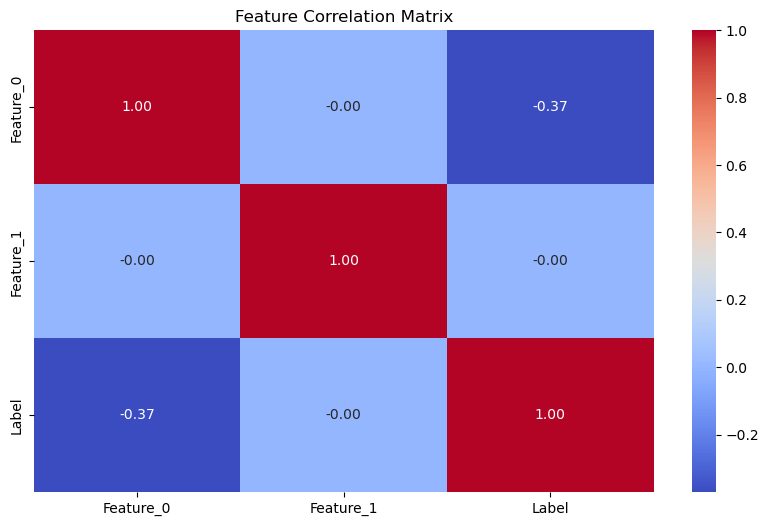

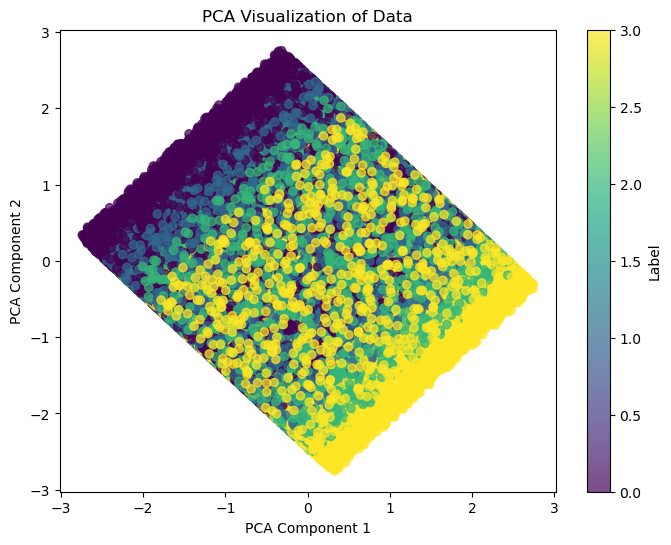

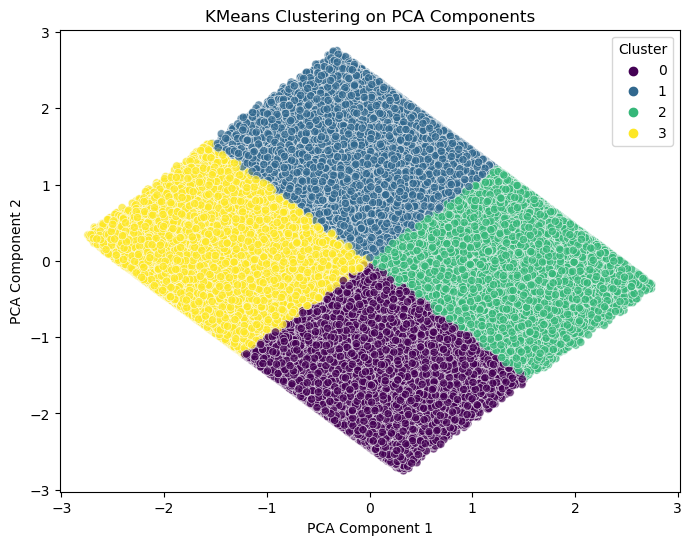

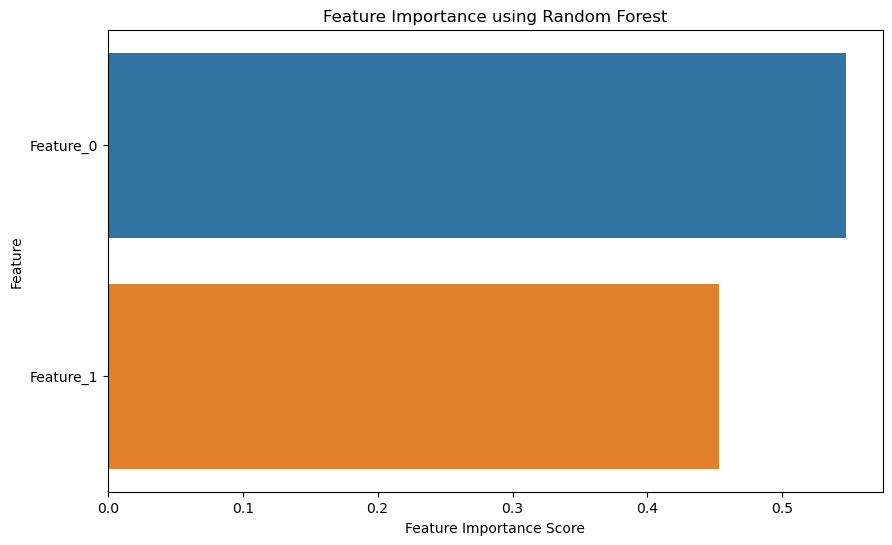

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load the dataset
df_data_path = r"C:\Users\arman.manoukyan\Downloads\ms.data"
df_labels_path = r"C:\Users\arman.manoukyan\Downloads\ms.labels"

df_data = pd.read_csv(df_data_path, delimiter="\s+", header=None)
df_labels = pd.read_csv(df_labels_path, header=None)

# Rename columns for clarity
df_data.columns = [f"Feature_{i}" for i in range(df_data.shape[1])]
df_labels.columns = ["Label"]

# Combine datasets
df_combined = pd.concat([df_data, df_labels], axis=1)

# Standardize data for better pattern detection
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_data)

# ---- 1. Correlation Matrix ----
plt.figure(figsize=(10, 6))
sns.heatmap(df_combined.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# ---- 2. PCA for Dimensionality Reduction ----
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_labels["Label"], cmap="viridis", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization of Data")
plt.colorbar(label="Label")
plt.show()

# ---- 3. Clustering with KMeans ----
kmeans = KMeans(n_clusters=len(df_labels["Label"].unique()), random_state=42, n_init=10)
df_combined["Cluster"] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_combined["Cluster"], palette="viridis", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KMeans Clustering on PCA Components")
plt.legend(title="Cluster")
plt.show()

# ---- 4. Feature Importance using RandomForest ----
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, df_labels.values.ravel())

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=rf.feature_importances_, y=df_data.columns)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance using Random Forest")
plt.show()


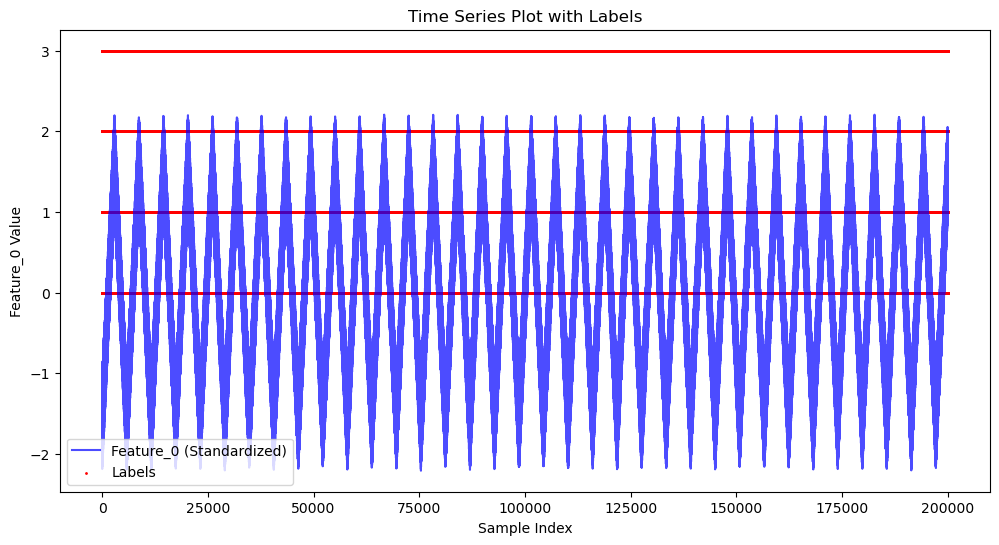

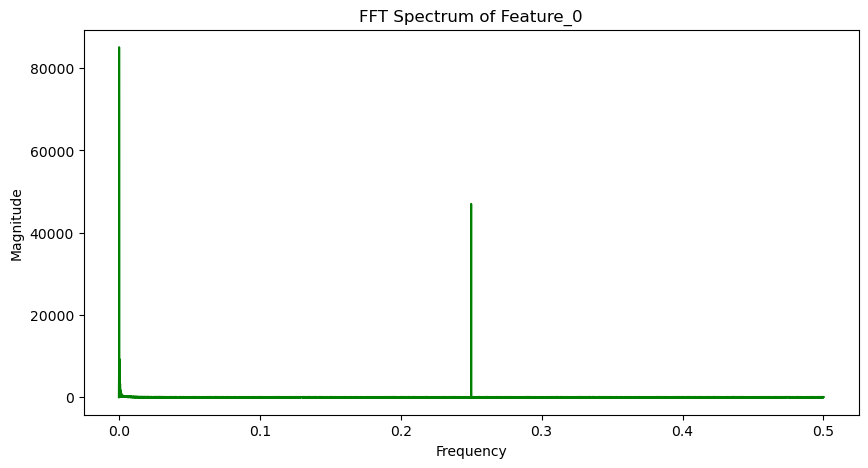

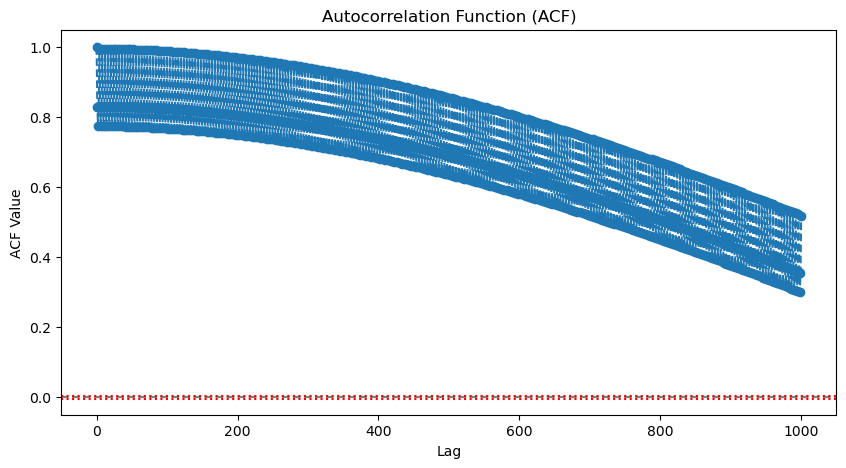

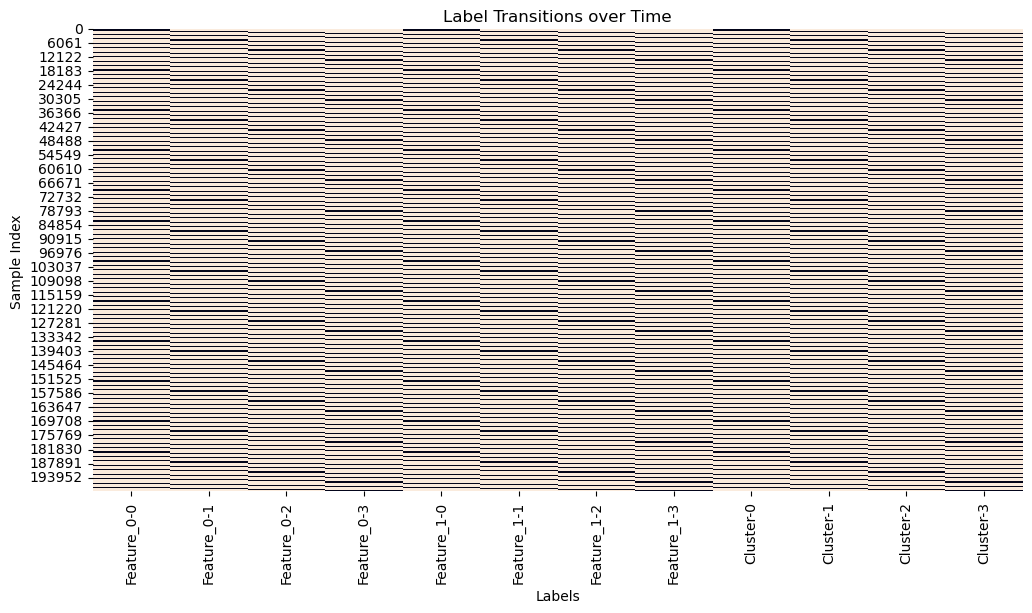

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fftpack import fft
from statsmodels.tsa.stattools import acf, pacf

# Standardize the feature values for periodicity detection
df_combined["Feature_0"] = (df_combined["Feature_0"] - df_combined["Feature_0"].mean()) / df_combined["Feature_0"].std()

# ---- 1. Time-Series Visualization ----
plt.figure(figsize=(12, 6))
plt.plot(df_combined["Feature_0"], label="Feature_0 (Standardized)", color="blue", alpha=0.7)
plt.scatter(df_combined.index, df_combined["Label"], color="red", s=1, label="Labels")
plt.title("Time Series Plot with Labels")
plt.xlabel("Sample Index")
plt.ylabel("Feature_0 Value")
plt.legend()
plt.show()

# ---- 2. Fourier Transform (FFT) to Detect Periodicity ----
fft_values = fft(df_combined["Feature_0"].values)
frequencies = np.fft.fftfreq(len(df_combined))

plt.figure(figsize=(10, 5))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_values[:len(frequencies)//2]), color="green")
plt.title("FFT Spectrum of Feature_0")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

# ---- 3. Autocorrelation Analysis ----
acf_values = acf(df_combined["Feature_0"], nlags=1000)

plt.figure(figsize=(10, 5))
plt.plot(acf_values, marker='o', linestyle='dashed')
plt.axhline(0, linestyle='--', color='gray')
plt.axhline(1.96/np.sqrt(len(df_combined)), linestyle='dotted', color='red')
plt.axhline(-1.96/np.sqrt(len(df_combined)), linestyle='dotted', color='red')
plt.title("Autocorrelation Function (ACF)")
plt.xlabel("Lag")
plt.ylabel("ACF Value")
plt.show()

# ---- 4. Label Transition Visualization ----
plt.figure(figsize=(12, 6))
sns.heatmap(df_combined.pivot(columns="Label").isna(), cbar=False)
plt.title("Label Transitions over Time")
plt.xlabel("Labels")
plt.ylabel("Sample Index")
plt.show()


In [13]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on Feature_0
result = adfuller(df_combined["Feature_0"])

# Print the test result
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

# Interpretation
if result[1] < 0.05:
    print("The data is stationary (suggests wave-based pattern).")
else:
    print("The data is non-stationary (suggests time-dependent pattern).")


ADF Statistic: -5.288477607307819
p-value: 5.784741306410292e-06
Critical Values: {'1%': -3.4303827103310676, '5%': -2.8615544575334875, '10%': -2.566777695225296}
The data is stationary (suggests wave-based pattern).


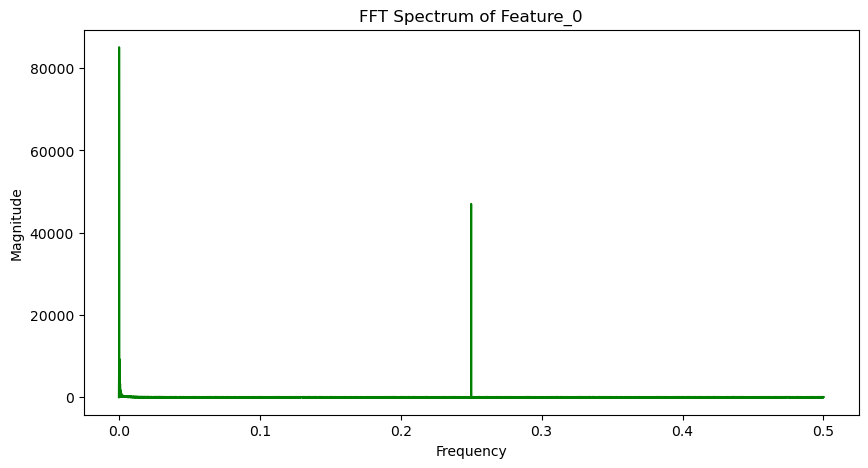

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# Compute FFT
fft_values = fft(df_combined["Feature_0"].values)
frequencies = np.fft.fftfreq(len(df_combined))

# Plot FFT
plt.figure(figsize=(10, 5))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_values[:len(frequencies)//2]), color="green")
plt.title("FFT Spectrum of Feature_0")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()


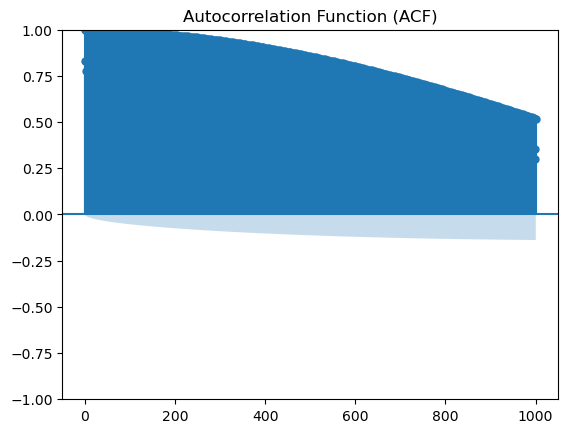

In [15]:
import statsmodels.api as sm

# Compute and plot ACF
sm.graphics.tsa.plot_acf(df_combined["Feature_0"], lags=1000)
plt.title("Autocorrelation Function (ACF)")
plt.show()


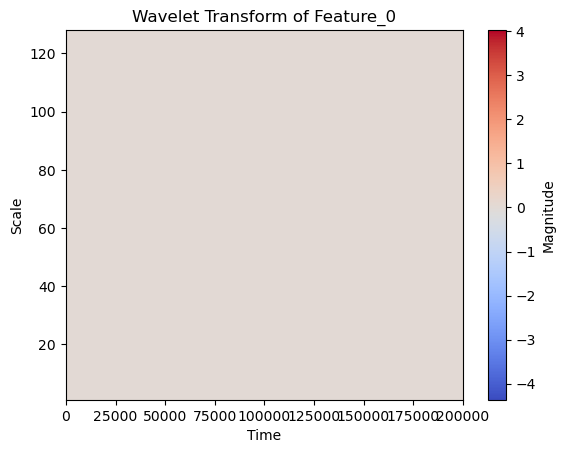

In [16]:
import pywt
import numpy as np

# Perform Continuous Wavelet Transform
scales = np.arange(1, 128)
coefficients, frequencies = pywt.cwt(df_combined["Feature_0"], scales, 'morl')

# Plot Wavelet Transform
plt.imshow(coefficients, aspect='auto', cmap='coolwarm', extent=[0, len(df_combined), 1, 128])
plt.colorbar(label="Magnitude")
plt.ylabel("Scale")
plt.xlabel("Time")
plt.title("Wavelet Transform of Feature_0")
plt.show()


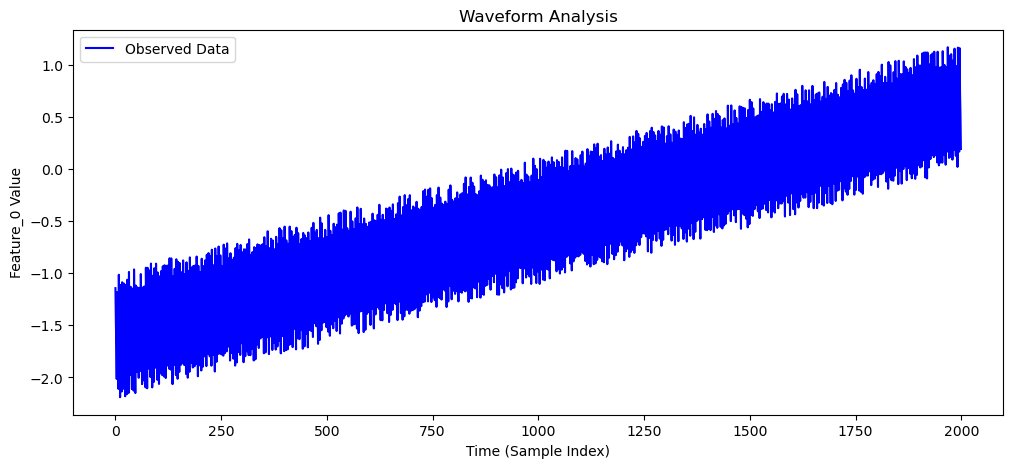

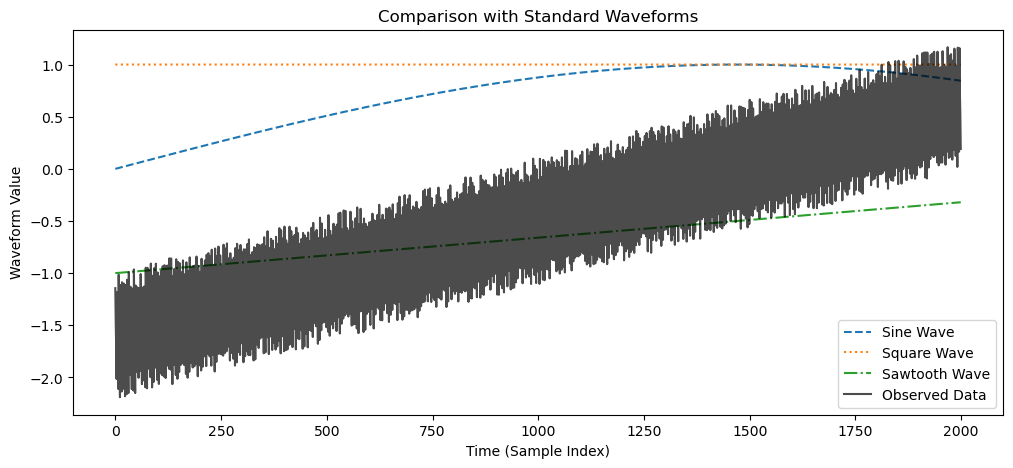

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, sawtooth, square

# Extract the main feature
feature_values = df_combined["Feature_0"].values
time = np.arange(len(feature_values))

# Plot raw waveform
plt.figure(figsize=(12, 5))
plt.plot(time[:2000], feature_values[:2000], label="Observed Data", color='blue')
plt.xlabel("Time (Sample Index)")
plt.ylabel("Feature_0 Value")
plt.title("Waveform Analysis")
plt.legend()
plt.show()

# Compare with standard waveforms
plt.figure(figsize=(12, 5))
plt.plot(time[:2000], np.sin(2 * np.pi * time[:2000] / 5882), label="Sine Wave", linestyle='dashed')
plt.plot(time[:2000], square(2 * np.pi * time[:2000] / 5882), label="Square Wave", linestyle='dotted')
plt.plot(time[:2000], sawtooth(2 * np.pi * time[:2000] / 5882), label="Sawtooth Wave", linestyle='dashdot')
plt.plot(time[:2000], feature_values[:2000], label="Observed Data", alpha=0.7, color='black')
plt.xlabel("Time (Sample Index)")
plt.ylabel("Waveform Value")
plt.title("Comparison with Standard Waveforms")
plt.legend()
plt.show()


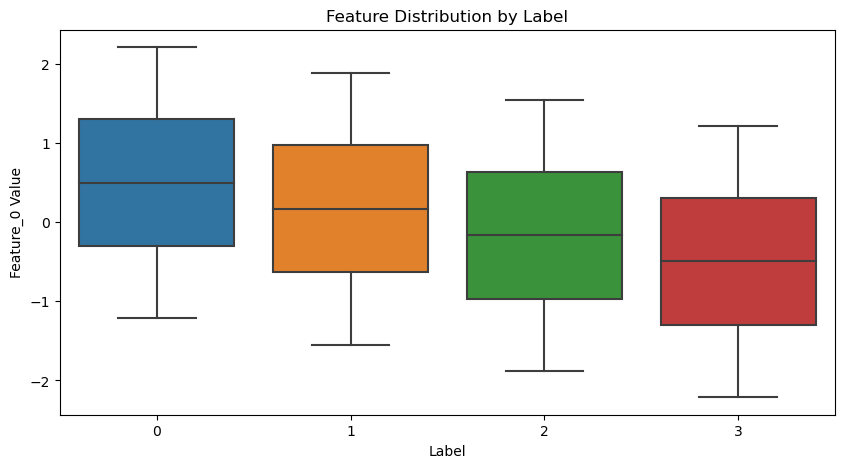

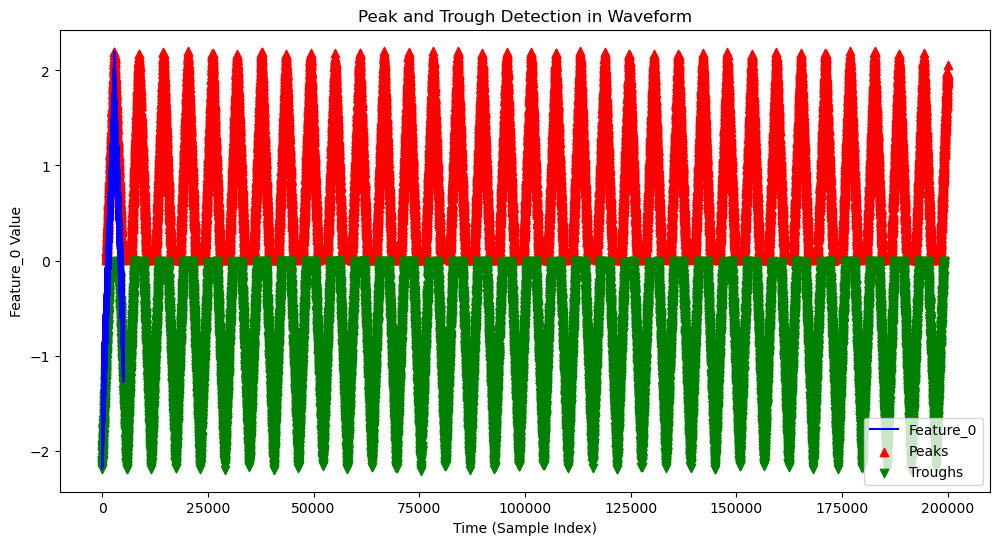

In [18]:
import seaborn as sns

# Plot label distribution against feature values
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_combined["Label"], y=df_combined["Feature_0"])
plt.xlabel("Label")
plt.ylabel("Feature_0 Value")
plt.title("Feature Distribution by Label")
plt.show()

# Find peak alignment with labels
peaks, _ = find_peaks(feature_values, height=0)
troughs, _ = find_peaks(-feature_values, height=0)

plt.figure(figsize=(12, 6))
plt.plot(time[:5000], feature_values[:5000], label="Feature_0", color="blue")
plt.scatter(time[peaks], feature_values[peaks], color="red", label="Peaks", marker="^")
plt.scatter(time[troughs], feature_values[troughs], color="green", label="Troughs", marker="v")
plt.xlabel("Time (Sample Index)")
plt.ylabel("Feature_0 Value")
plt.title("Peak and Trough Detection in Waveform")
plt.legend()
plt.show()


In [19]:
# Calculate the dominant frequency
sampling_rate = 1  # Assuming 1 sample per time unit
fft_values = np.fft.fft(feature_values)
frequencies = np.fft.fftfreq(len(feature_values), d=sampling_rate)

# Extract dominant frequency
dominant_freq = abs(frequencies[np.argmax(abs(fft_values))])
print(f"Dominant Frequency: {dominant_freq} Hz")


Dominant Frequency: 0.00017 Hz


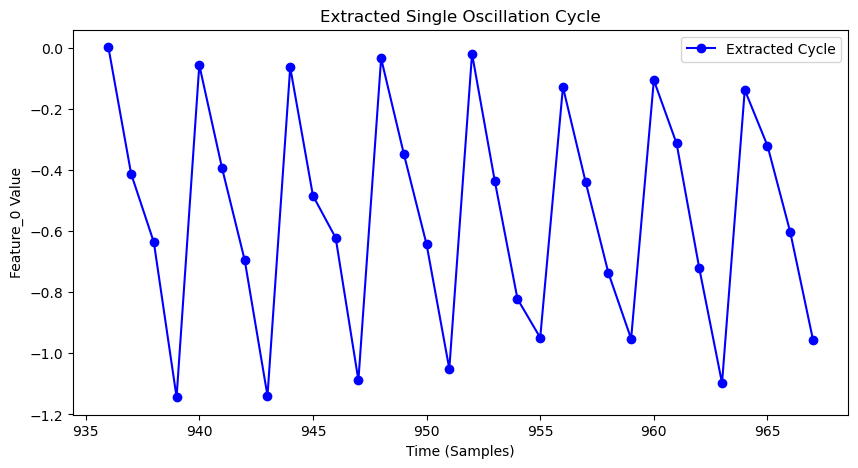

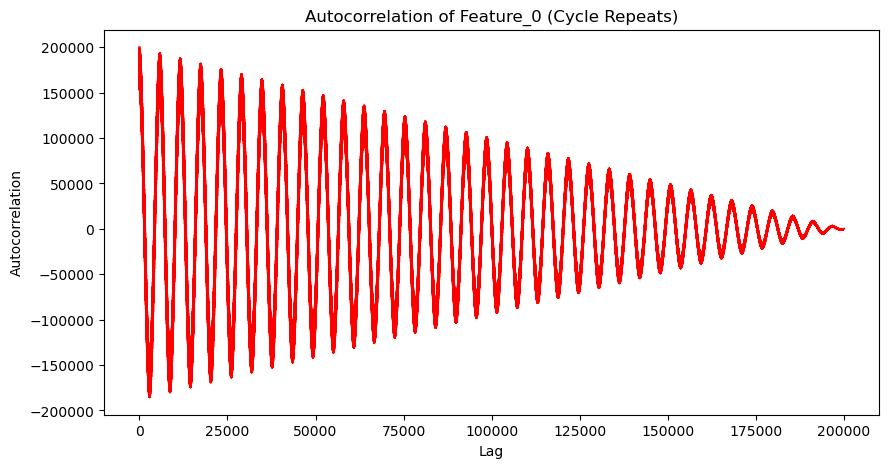

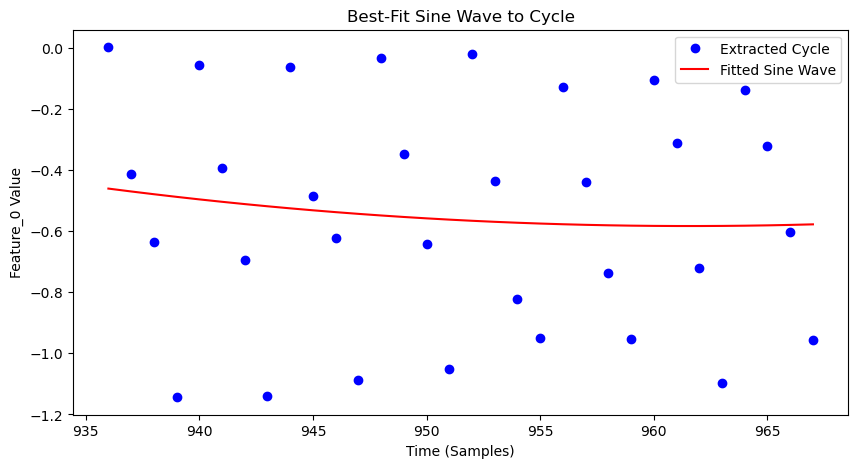

Detected Sine Wave Parameters:
  Amplitude: 142.34910638881198
  Frequency (Hz): 0.0002582746796941111
  Phase Shift: 185.36432518933213
  Vertical Offset: 141.76604628252034


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, correlate
from scipy.optimize import curve_fit

# Extract feature values
feature_values = df_combined["Feature_0"].values
time = np.arange(len(feature_values))

# Step 1: Identify a full cycle using peaks
peaks, _ = find_peaks(feature_values, height=0)
if len(peaks) < 2:
    raise ValueError("Not enough peaks detected to extract a full cycle.")

cycle_start = peaks[0]
cycle_end = peaks[1]

# Extract one full cycle
cycle_x = time[cycle_start:cycle_end]
cycle_y = feature_values[cycle_start:cycle_end]

# Plot the extracted cycle
plt.figure(figsize=(10, 5))
plt.plot(cycle_x, cycle_y, marker='o', label="Extracted Cycle", color='blue')
plt.xlabel("Time (Samples)")
plt.ylabel("Feature_0 Value")
plt.title("Extracted Single Oscillation Cycle")
plt.legend()
plt.show()

# Step 2: Check cycle similarity across dataset using autocorrelation
corr = correlate(feature_values, feature_values, mode='full')
lags = np.arange(-len(feature_values)+1, len(feature_values))

plt.figure(figsize=(10, 5))
plt.plot(lags[len(lags)//2:], corr[len(corr)//2:], color='red')
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation of Feature_0 (Cycle Repeats)")
plt.show()

# Step 3: Fit a sine wave to the extracted cycle
def sine_wave(x, A, omega, phi, C):
    return A * np.sin(omega * x + phi) + C

# Estimate initial parameters
A_est = (np.max(cycle_y) - np.min(cycle_y)) / 2
omega_est = 2 * np.pi / (cycle_end - cycle_start)
phi_est = 0
C_est = np.mean(cycle_y)

popt, _ = curve_fit(sine_wave, cycle_x, cycle_y, p0=[A_est, omega_est, phi_est, C_est])

# Plot the best-fit sine wave
plt.figure(figsize=(10, 5))
plt.plot(cycle_x, cycle_y, 'bo', label="Extracted Cycle")
plt.plot(cycle_x, sine_wave(cycle_x, *popt), 'r-', label="Fitted Sine Wave")
plt.xlabel("Time (Samples)")
plt.ylabel("Feature_0 Value")
plt.title("Best-Fit Sine Wave to Cycle")
plt.legend()
plt.show()

# Print detected sine wave parameters
A_fit, omega_fit, phi_fit, C_fit = popt
print(f"Detected Sine Wave Parameters:")
print(f"  Amplitude: {A_fit}")
print(f"  Frequency (Hz): {omega_fit / (2 * np.pi)}")
print(f"  Phase Shift: {phi_fit}")
print(f"  Vertical Offset: {C_fit}")


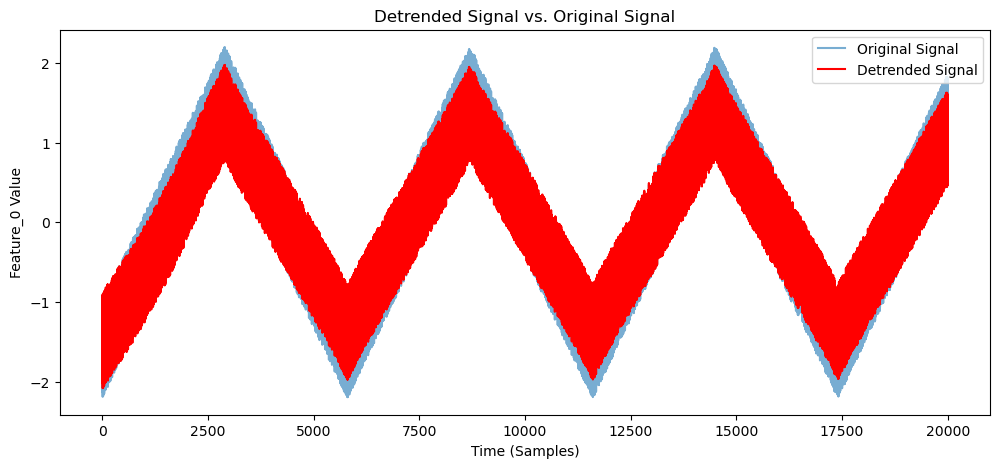

In [21]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt

# Extract feature values
feature_values = df_combined["Feature_0"].values
time = np.arange(len(feature_values))

# Apply a moving average filter to estimate the trend
window_size = 5000  # Adjust based on data length
trend = np.convolve(feature_values, np.ones(window_size)/window_size, mode='same')

# Detrend the signal
detrended_signal = feature_values - trend

# Plot original vs detrended signal
plt.figure(figsize=(12, 5))
plt.plot(time[:20000], feature_values[:20000], label="Original Signal", alpha=0.6)
plt.plot(time[:20000], detrended_signal[:20000], label="Detrended Signal", color="red")
plt.xlabel("Time (Samples)")
plt.ylabel("Feature_0 Value")
plt.title("Detrended Signal vs. Original Signal")
plt.legend()
plt.show()


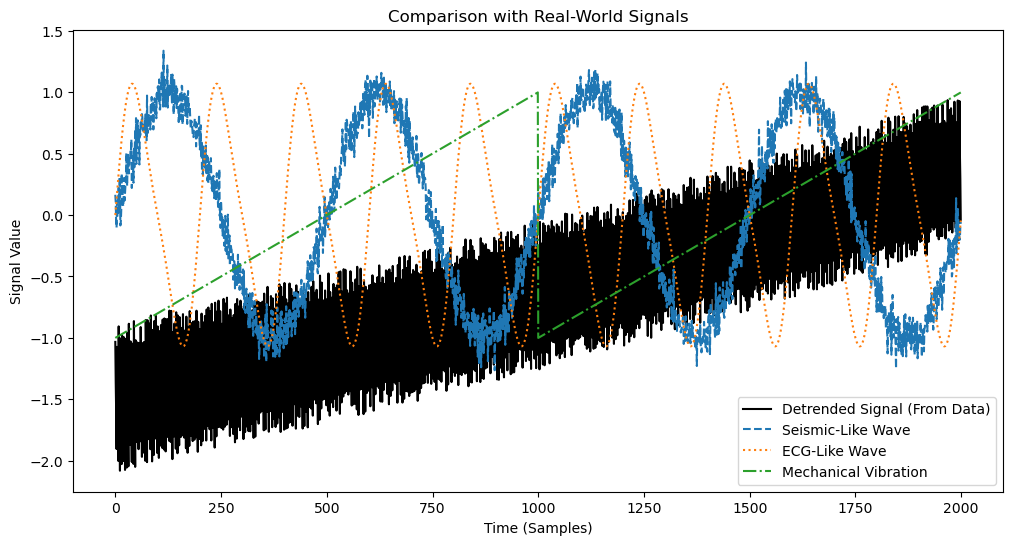

In [22]:
# Generate comparison signals (synthetic real-world examples)
synthetic_seismic = np.sin(2 * np.pi * time[:2000] / 500) + np.random.normal(0, 0.1, 2000)  # Seismic-like
synthetic_ecg = np.sin(2 * np.pi * time[:2000] / 200) + 0.2 * np.sin(4 * np.pi * time[:2000] / 200)  # ECG-like
synthetic_mechanical = signal.sawtooth(2 * np.pi * time[:2000] / 1000)  # Mechanical vibration

# Plot detrended signal vs real-world signals
plt.figure(figsize=(12, 6))
plt.plot(time[:2000], detrended_signal[:2000], label="Detrended Signal (From Data)", color='black')
plt.plot(time[:2000], synthetic_seismic, label="Seismic-Like Wave", linestyle='dashed')
plt.plot(time[:2000], synthetic_ecg, label="ECG-Like Wave", linestyle='dotted')
plt.plot(time[:2000], synthetic_mechanical, label="Mechanical Vibration", linestyle='dashdot')
plt.xlabel("Time (Samples)")
plt.ylabel("Signal Value")
plt.title("Comparison with Real-World Signals")
plt.legend()
plt.show()
